### Principal Component Analysis using Numpy

In this notebook, I will be creating an introduction with Principal Component Analysis (PCA) using only Numpy. 

* Implement Principal Component Analysis (PCA) from scratch with Numpy and Python
* Conduct basic exploratory data analysis (EDA)
* Create simple data visualizations with Seaborn and Matplotlib


In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

* I will use the iris dataset from UC Irvine Machine Learning Repository

In [10]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris = pd.read_csv(data_url, header=None)

# The raw iris dataset does not have headers, we need to identify these headers.
iris.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

# Drop no entries
iris.dropna(how='all', inplace=True)

iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
iris.shape

(150, 5)

In [15]:
iris.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

* The iris dataset is a small dataset but it is sufficient for this study.

### Visualize the Iris Dataset

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

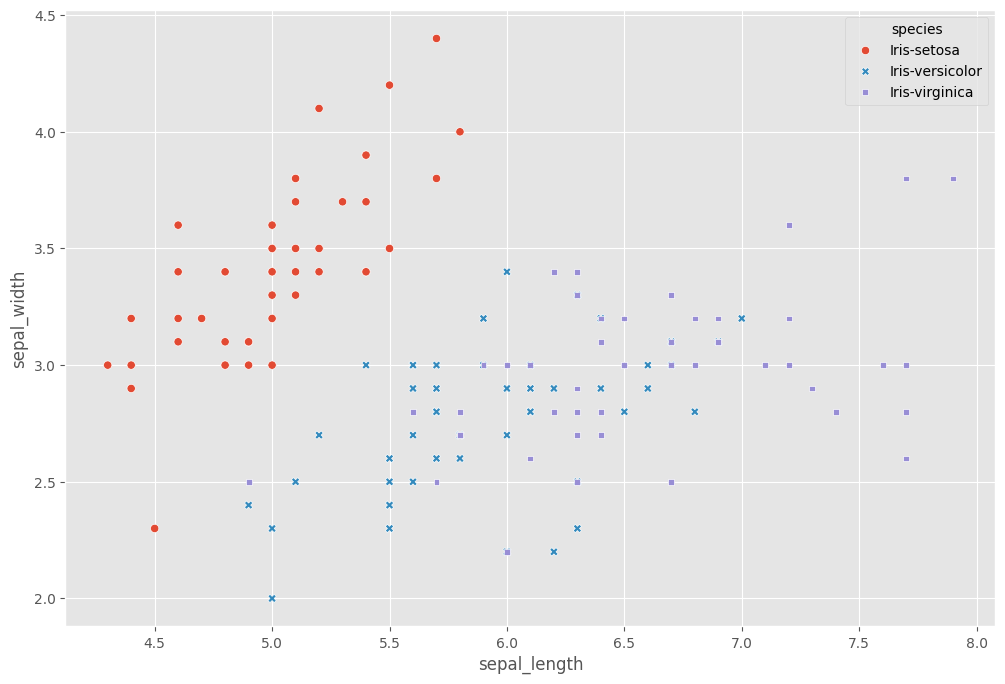

In [18]:
sns.scatterplot(x=iris.sepal_length, y=iris.sepal_width, 
                hue=iris.species,
                style=iris.species
                )

### Standardize the data

In [23]:
x = iris.iloc[:,0:4].values
y = iris.species.values


In [29]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(x)

* The covariance Matrix is used to capture the variance and linear relationships between variables, enabling PCA to identify the directions (principal components) that maximize the variance in the data.

In [30]:
covariance_matrix = np.cov(X.T)
print(f"Covariance Matrix: \n{covariance_matrix}")

Covariance Matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


* The Eigenvalues and Eigenvectors are used to help identify the principal components of the data. The eigenvectors determine the directions of these components, while the eigenvalues indicate their magnitude, showing how much variance each principal component captures

In [33]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print(f"Eigenvectors: \n{eigen_vectors}\n")
print(f"Eigenvalues: \n{eigen_values}")

Eigenvectors: 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues: 
[2.93035378 0.92740362 0.14834223 0.02074601]


* Next, I will use Singular Value Decomposition (SVD) to decompose the data matrix into three matrices, revealing the intrinsic structure of the data. It simplifies the computation of principal components by identifying the directions of maximum variance and their corresponding magnitudes, facilitating effective dimensionality reduction and data analysis.

In [35]:
eigen_vec_svd, s,v = np.linalg.svd(X.T)
print(f"Eigenvector SVD: {eigen_vec_svd}")

Eigenvector SVD: [[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]


* Sort the Eigenvalues in  descending order and select the top principal components. Set the threshold for the cumulative explained variance (95%) and select the corresponding number of principal components

In [36]:
for val in eigen_values:
    print(val)

2.9303537755893165
0.9274036215173417
0.14834222648163994
0.020746013995596356


In [42]:
variance_explained = [(i/sum(eigen_values))*100 for i in eigen_values ] 
variance_explained

[72.77045209380132, 23.03052326768064, 3.68383195762739, 0.5151926808906425]

In [45]:
cumulative_var_explained = np.cumsum(variance_explained)
cumulative_var_explained

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

* Visualize the Cumulative Variance Explained

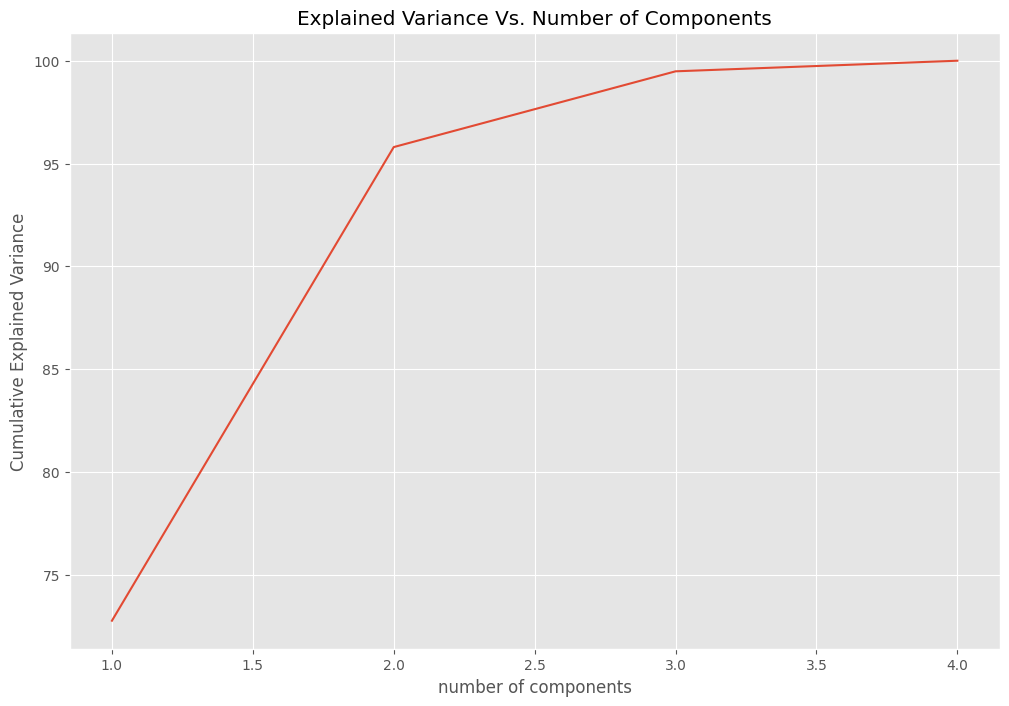

In [47]:
sns.lineplot(x=[1,2,3,4], y=cumulative_var_explained)
plt.xlabel('number of components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Vs. Number of Components')
plt.show()

In [48]:
eigen_vectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [50]:
projection_matrix = (eigen_vectors.T[:][:])[:2].T
projection_matrix

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

In [55]:
X_pca = X.dot(projection_matrix)

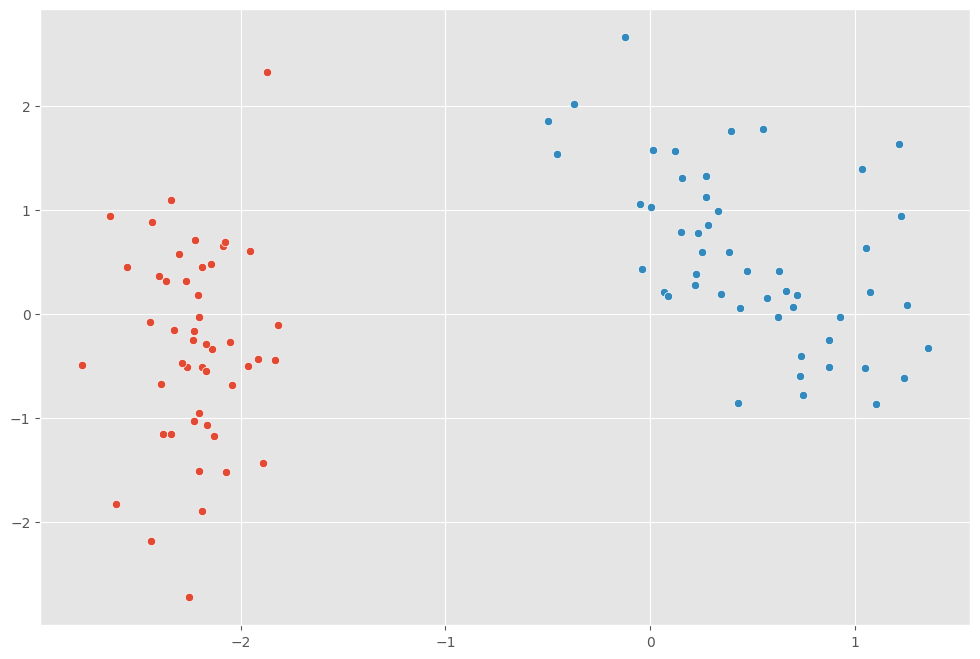

In [58]:
for species in ('Iris-setosa','Iris-versicolor','Iris-virginia'):
    sns.scatterplot(x= X_pca[y==species, 0], y = X_pca[y==species, 1])